### Importing libraries

## Exploratory Data Analysis

In [1]:
import pandas as pd 

# how many samples do we have? -- We have 698 samples

# how many features do we have? -- We have 11 features

# what are the classes -- M and B

# how many classes do we have? -- We have 2 classes

# how many samples of each class? are they balanced?

# B    357
# M    212

# The dataset is not balanced. B accounts for 62.74% of the dataset, and M accounts for 37.26%

# read the dataset
df_cancer = pd.read_csv("cancer.csv")
print(df_cancer)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [2]:
print(df_cancer.info())

# what are the names of the features

# id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean
# concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean

# what are the types of features?
# int64, Object, float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB
None


In [3]:
classes = pd.unique(df_cancer.iloc[:, 1])
num_classes = len(classes)
each_class = df_cancer.iloc[:, 1].value_counts()

print(classes)
print(num_classes)
print(each_class)

['M' 'B']
2
B    357
M    212
Name: diagnosis, dtype: int64


In [4]:
# change categorical values of variety to numeric values

from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df_cancer['diagnosis'] = labelencoder.fit_transform(df_cancer['diagnosis']) #fitting and transforming the desired categorical column.

print(df_cancer['diagnosis'].unique())

df_cancer

[1 0]


id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave points_mean  symmetry_mean  fractal_dimension_mean  
0                0.14710         0.2419                 0.07871  
1                0.07017         0.1812                 0.05667  
2                0.12790         0.2069                 0.05999  
3                0.10520         0.2597                 0.09744  
4                0.10430         0.1809                 0.05883  
..                   ...            ...                     ...  
564              0.13890         0.1726                 0.05623  
565              0.09791         0.1752                 0.05533  
566              0.05302         0.1590                 0.05648  
567              0.15200         0.2397                 0.07016  
568              0.00000         0.1587                 0.05884  

[569 rows x 12 columns]

In [5]:
# Drop the id column since we won't be needing it
df_cancer = df_cancer.drop('id', axis=1)

df_cancer

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2597                 0.09744  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

### 2. Check missing values, outliers and statistics

In [6]:
# are there any missing values?
# if so, what are you going to do about the missing values?

# There are no missing values in our dataset

In [7]:
df_cancer.isna().apply(pd.value_counts)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
False        569          569           569             569        569   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
False              569               569             569                  569   

       symmetry_mean  fractal_dimension_mean  
False            569                     569

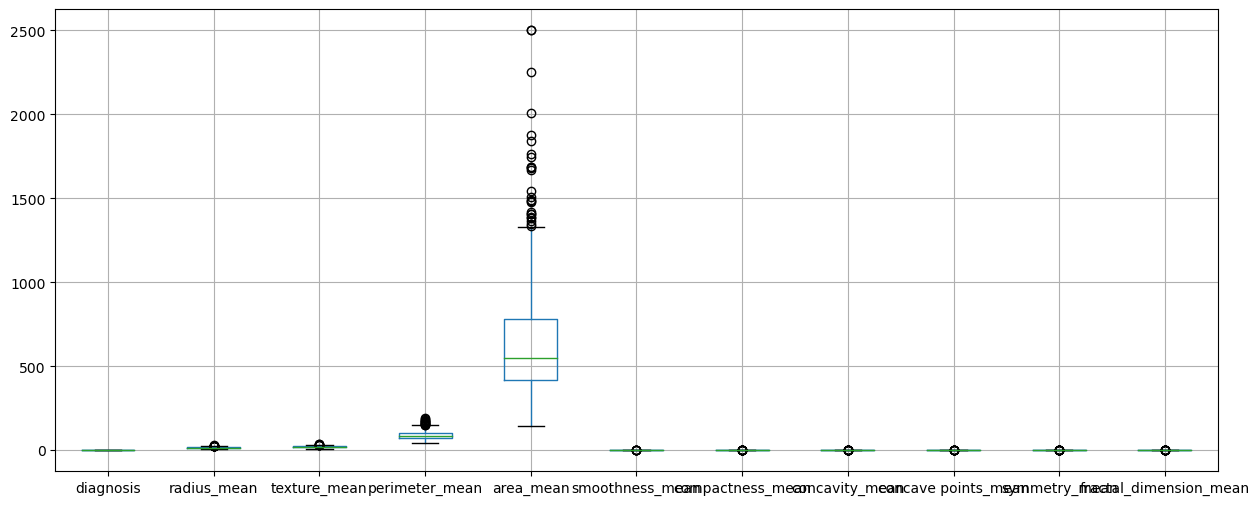

count        mean         std        min        25%  \
diagnosis               569.0    0.372583    0.483918    0.00000    0.00000   
radius_mean             569.0   14.127292    3.524049    6.98100   11.70000   
texture_mean            569.0   19.289649    4.301036    9.71000   16.17000   
perimeter_mean          569.0   91.969033   24.298981   43.79000   75.17000   
area_mean               569.0  654.889104  351.914129  143.50000  420.30000   
smoothness_mean         569.0    0.096360    0.014064    0.05263    0.08637   
compactness_mean        569.0    0.104341    0.052813    0.01938    0.06492   
concavity_mean          569.0    0.088799    0.079720    0.00000    0.02956   
concave points_mean     569.0    0.048919    0.038803    0.00000    0.02031   
symmetry_mean           569.0    0.181162    0.027414    0.10600    0.16190   
fractal_dimension_mean  569.0    0.062798    0.007060    0.04996    0.05770   

                              50%        75%         max  
diagnosis                 0.00000    1.00000     1.00000  
radius_mean              13.37000   15.78000    28.11000  
texture_mean             18.84000   21.80000    39.28000  
perimeter_mean           86.24000  104.10000   188.50000  
area_mean               551.10000  782.70000  2501.00000  
smoothness_mean           0.09587    0.10530     0.16340  
compactness_mean          0.09263    0.13040     0.34540  
concavity_mean            0.06154    0.13070     0.42680  
concave points_mean       0.03350    0.07400     0.20120  
symmetry_mean             0.17920    0.19570     0.30400  
fractal_dimension_mean    0.06154    0.06612     0.09744

In [8]:
from matplotlib import pyplot as plt

df_cancer.boxplot(figsize = (15,6))

#plt.savefig('plots/i0.png')
plt.show()
df_cancer.describe().T

In [9]:
# Wrap IQR check into a function for easier later usage
def check_outliers(dataframe):
    Q1 = df_cancer.quantile(0.25)
    Q3 = df_cancer.quantile(0.75)
    IQR = Q3 - Q1

    # let's see how many outliers are in every column
    df2 = ((df_cancer < (Q1 - 1.5 * IQR)).sum()) 
    df3 = ((df_cancer > (Q3 + 1.5 * IQR)).sum())
    print(df2)
    print(df3)
    
check_outliers(df_cancer)

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           1
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             1
fractal_dimension_mean    0
dtype: int64
diagnosis                  0
radius_mean               14
texture_mean               7
perimeter_mean            13
area_mean                 25
smoothness_mean            5
compactness_mean          16
concavity_mean            18
concave points_mean       10
symmetry_mean             14
fractal_dimension_mean    15
dtype: int64


In [10]:
# Wrap IQR method into a function for easier later usage
def handle_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    
    # print(f'q1 of {column_name}: {q1}')
    # print(f'q3 of {column_name}: {q3}')
    
    df.loc[(df[column_name] < (q1 - 1.5 * iqr)), column_name] = (q1 - 1.5 * iqr)
    df.loc[(df[column_name] > (q3 + 1.5 * iqr)), column_name] = (q3 + 1.5 * iqr)
    
    return df

In [11]:
handle_outliers(df_cancer, 'radius_mean')
handle_outliers(df_cancer, 'texture_mean')
handle_outliers(df_cancer, 'perimeter_mean')
handle_outliers(df_cancer, 'area_mean')
handle_outliers(df_cancer, 'smoothness_mean')
handle_outliers(df_cancer, 'compactness_mean')
handle_outliers(df_cancer, 'concavity_mean')
handle_outliers(df_cancer, 'symmetry_mean')
handle_outliers(df_cancer, 'concave points_mean')
handle_outliers(df_cancer, 'fractal_dimension_mean')

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1326.3   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.118400           0.22862         0.28241              0.14710   
1           0.084740           0.07864         0.08690              0.07017   
2           0.109600           0.15990         0.19740              0.12790   
3           0.133695           0.22862         0.24140              0.10520   
4           0.100300           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564         0.111000           0.11590         0.24390              0.13890   
565         0.097800           0.10340         0.14400              0.09791   
566         0.084550           0.10230         0.09251              0.05302   
567         0.117800           0.22862         0.28241              0.15200   
568         0.057975           0.04362         0.00000              0.00000   

     symmetry_mean  fractal_dimension_mean  
0           0.2419                 0.07871  
1           0.1812                 0.05667  
2           0.2069                 0.05999  
3           0.2464                 0.07875  
4           0.1809                 0.05883  
..             ...                     ...  
564         0.1726                 0.05623  
565         0.1752                 0.05533  
566         0.1590                 0.05648  
567         0.2397                 0.07016  
568         0.1587                 0.05884  

[569 rows x 11 columns]

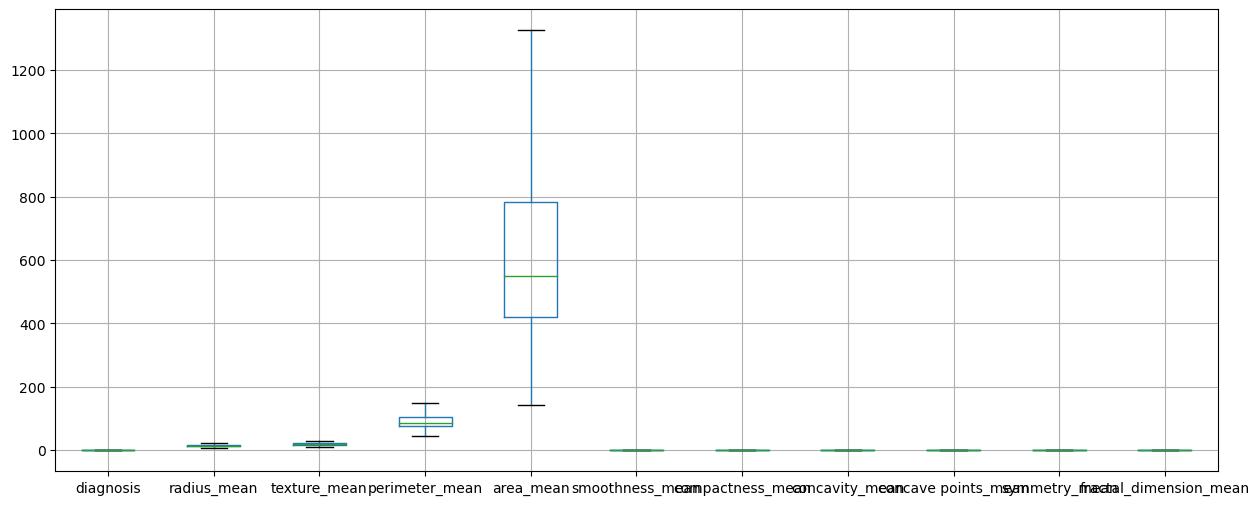

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
dtype: int64


In [12]:
# Recheck the dataframe for outliers
df_cancer.boxplot(figsize = (15,6))

plt.show()
df_cancer.describe().T

check_outliers(df_cancer)

### 3. Check distributions and coorelations

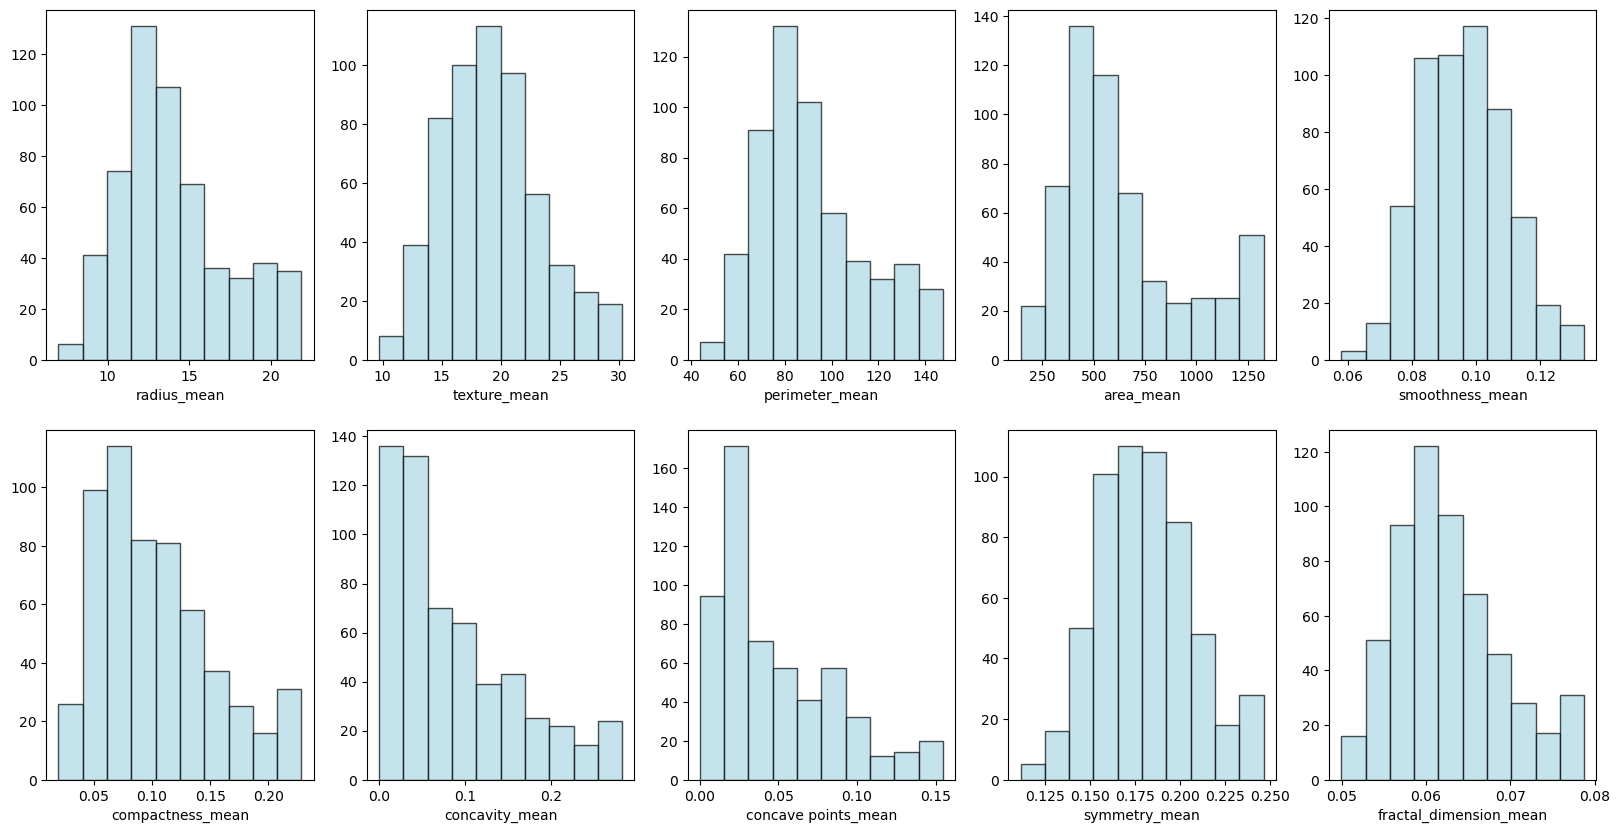

In [13]:
# what kind of distributions do the features have?

plt.figure(figsize= (20,10))
plt.subplot(2, 5, 1)
plt.hist(df_cancer['radius_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('radius_mean')

plt.subplot(2, 5, 2)
plt.hist(df_cancer['texture_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('texture_mean')

plt.subplot(2,5,3)
plt.hist(df_cancer['perimeter_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('perimeter_mean')

plt.subplot(2,5,4)
plt.hist(df_cancer['area_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('area_mean')

plt.subplot(2,5,5)
plt.hist(df_cancer['smoothness_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('smoothness_mean')

plt.subplot(2,5,6)
plt.hist(df_cancer['compactness_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('compactness_mean')

plt.subplot(2,5,7)
plt.hist(df_cancer['concavity_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('concavity_mean')

plt.subplot(2,5,8)
plt.hist(df_cancer['concave points_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('concave points_mean')

plt.subplot(2,5,9)
plt.hist(df_cancer['symmetry_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('symmetry_mean')

plt.subplot(2,5,10)
plt.hist(df_cancer['fractal_dimension_mean'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('fractal_dimension_mean')

plt.show()

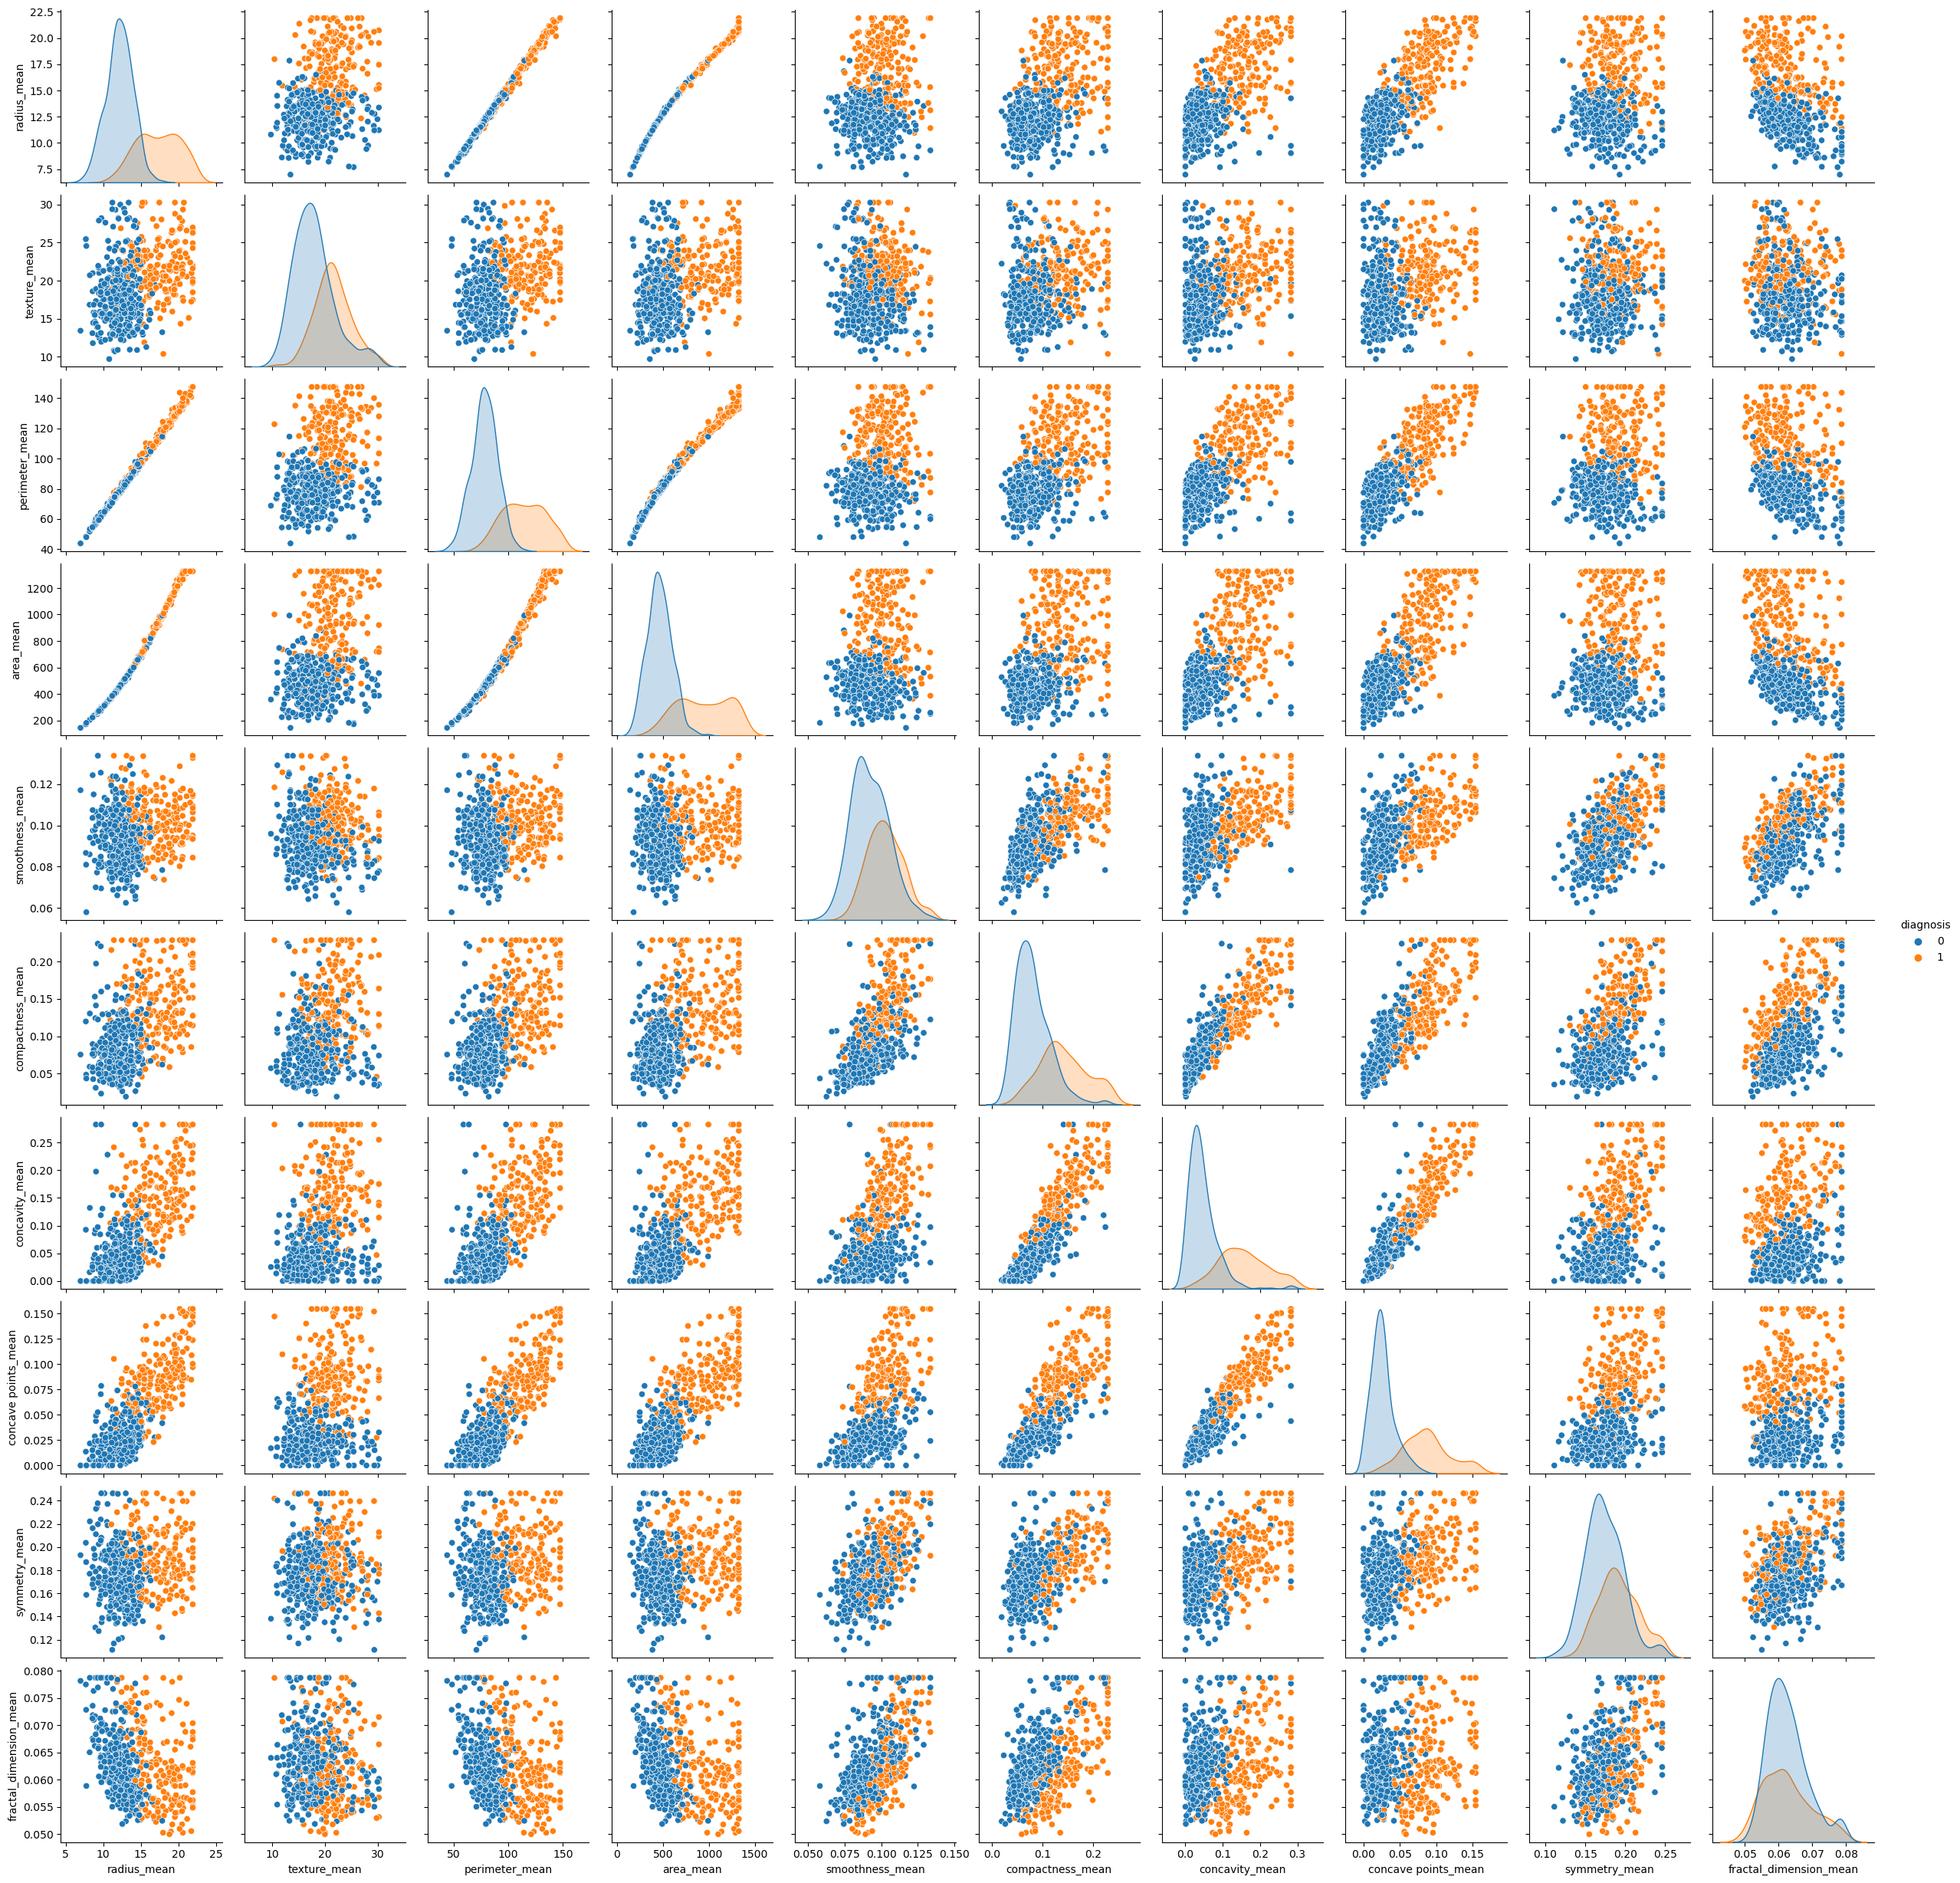

In [14]:
import seaborn as sns

# what kind of correlation does the data exhibit?

sns.pairplot(df_cancer, hue='diagnosis')  #pairplot
#plt.savefig('plots/pairplot.png')
plt.show()

Analyzing the pair plots, most of the features, are visually split among each other. 

In [15]:
cancer_correlation = df_cancer.corr()
display(cancer_correlation)

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000     0.745217      0.419123        0.759006   
radius_mean              0.745217     1.000000      0.332760        0.997692   
texture_mean             0.419123     0.332760      1.000000        0.339588   
perimeter_mean           0.759006     0.997692      0.339588        1.000000   
area_mean                0.752786     0.993891      0.341552        0.991861   
smoothness_mean          0.366931     0.167672     -0.015997        0.204990   
compactness_mean         0.608494     0.502741      0.241666        0.553698   
concavity_mean           0.727168     0.674539      0.318654        0.714624   
concave points_mean      0.788099     0.811833      0.301509        0.841871   
symmetry_mean            0.334536     0.146763      0.079586        0.181325   
fractal_dimension_mean  -0.006801    -0.319056     -0.065946       -0.266586   

                        area_mean  smoothness_mean  compactness_mean  \
diagnosis                0.752786         0.366931          0.608494   
radius_mean              0.993891         0.167672          0.502741   
texture_mean             0.341552        -0.015997          0.241666   
perimeter_mean           0.991861         0.204990          0.553698   
area_mean                1.000000         0.167400          0.498665   
smoothness_mean          0.167400         1.000000          0.661938   
compactness_mean         0.498665         0.661938          1.000000   
concavity_mean           0.680126         0.526544          0.889882   
concave points_mean      0.814133         0.560961          0.832541   
symmetry_mean            0.155152         0.557597          0.588842   
fractal_dimension_mean  -0.303524         0.586706          0.557003   

                        concavity_mean  concave points_mean  symmetry_mean  \
diagnosis                     0.727168             0.788099       0.334536   
radius_mean                   0.674539             0.811833       0.146763   
texture_mean                  0.318654             0.301509       0.079586   
perimeter_mean                0.714624             0.841871       0.181325   
area_mean                     0.680126             0.814133       0.155152   
smoothness_mean               0.526544             0.560961       0.557597   
compactness_mean              0.889882             0.832541       0.588842   
concavity_mean                1.000000             0.928382       0.489029   
concave points_mean           0.928382             1.000000       0.460386   
symmetry_mean                 0.489029             0.460386       1.000000   
fractal_dimension_mean        0.325513             0.170028       0.471760   

                        fractal_dimension_mean  
diagnosis                            -0.006801  
radius_mean                          -0.319056  
texture_mean                         -0.065946  
perimeter_mean                       -0.266586  
area_mean                            -0.303524  
smoothness_mean                       0.586706  
compactness_mean                      0.557003  
concavity_mean                        0.325513  
concave points_mean                   0.170028  
symmetry_mean                         0.471760  
fractal_dimension_mean                1.000000

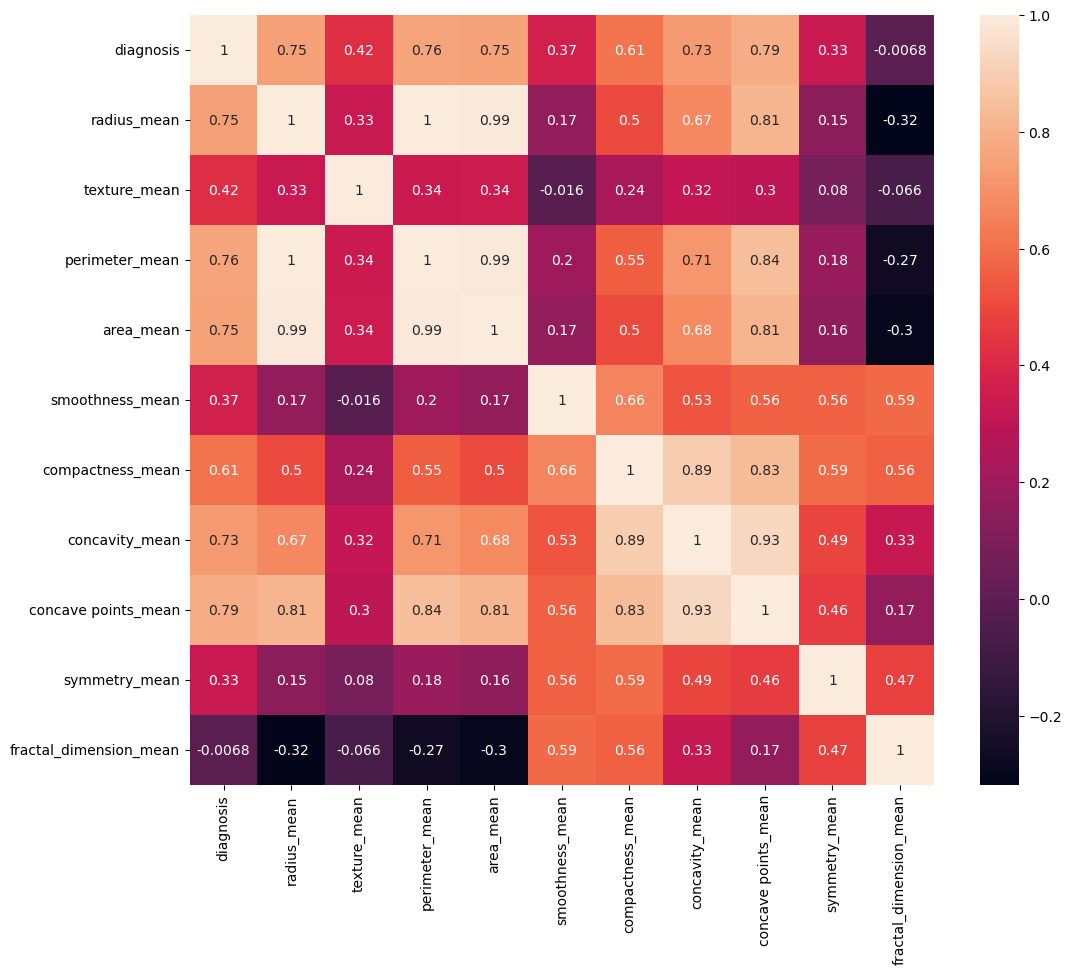

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(cancer_correlation, annot=True)
plt.show()

The heatmap shows a lot of features that are highly correlated with each other, with a few features having a correlation above above, 0.94, close to 1. This means that there are several features we can check in a pair, as well as add more dimensions into our classifier algorithm to try and acheive a higher accuracy score. 

# k Nearet Neighbor (kNN)

In [17]:
from IPython.display import Image
%matplotlib inline

In [18]:
# define plot_decision_regions for later use

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')        

In [20]:
import numpy as np

In [21]:
# X = df_cancer.iloc[:, [1, 4]] # area_mean and radius_mean -- 0.889 Accuracy score
# X = df_cancer.iloc[:, [6, 8]] # compactness_mean & concave points_mean -- 0.924 Accuracy score 
# X = df_cancer.iloc[:, [3, 4, 6, 8]] # perimeter_mean & concave points_mean -- 0.9415204678362573
# X = df_cancer.iloc[:, [1, 3, 4, 6, 8]] 5 dimensions -- 0.9473684210526315
X = df_cancer.iloc[:, [3, 8]] # perimeter_mean & concave points_mean -- 0.936 Accuracy score 
y = df_cancer.iloc[:, 0]

# print(X)
print(y)
print(X.shape)
print(y.shape)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
(569, 2)
(569,)


In [22]:
y = pd.factorize(df_cancer.iloc[:, 0])[0]
print(y.shape)
print(y)

(569,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0

In [23]:
# 2. Split data into a training set and test set
#    Splitting data into 70% training and 30% test data:

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [25]:
print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

print(X_train.shape)
print(X_test.shape)
print(X_train)

Labels count in y: [212 357]
Labels count in y_train: [148 250]
Labels count in y_test: [ 64 107]
(398, 2)
(171, 2)
     perimeter_mean  concave points_mean
227           97.45              0.03780
104           67.41              0.01201
248           68.01              0.01615
356           85.09              0.05603
90            94.57              0.02957
..              ...                  ...
479          109.80              0.09194
509          103.80              0.08520
120           73.34              0.02623
235           89.79              0.01896
161          126.30              0.09667

[398 rows x 2 columns]


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

#scaler = StandardScaler()

#X_train_std = scaler.fit_transform(X_train)

#X_test_std = scaler.transform(X_test)


scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
X_train_normal= scaler.transform(X_train) # the scaler is applied to the training set
X_test_normal = scaler.transform(X_test) # the scaler is applied to the test set

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')

# knn=KNeighborsClassifier(3)
# knn.fit(X_train_normal, y_train)
# y_pred_sklearn= knn.predict(X_test)
# print(y_pred_sklearn)

In [28]:
# 4. Build the model (.fit)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)


#scaler= Normalizer().fit(X_train) # the scaler is fitted to the training set
#X_train_normal= scaler.transform(X_train) # the scaler is applied to the training set
#X_test_normal = scaler.transform(X_test) # the scaler is applied to the test set

In [ ]:
knn.fit(X_train_std, y_train)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('perimeter_mean')
plt.ylabel('Radius Mean')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
# plt.show()

In [ ]:
# 5. Apply the model to the test data (.predict)
# 6. Estimate performance (accuracy score)

In [ ]:
from sklearn import metrics 
y_pred = knn.predict(X_test_std)
print(metrics.accuracy_score(y_test, y_pred))

# Answer the following questions:

### 1. What is the maximum accuracy you can achieve with the least amount of features?

The highest accuracy I am able to achieve with the least amount of features $(2)$, is $0.9357$, or $93.57\%$, by using:

- perimeter_mean 
- concave points_mean

It is important for me to mention, that I was able to achieve a better accuracy of $94.74\%$ by increasing the dimensions to 5, and using the listed features below:

- radius_mean
- perimeter_mean
- area_mean
- compactness_mean
- concave points_mean

### 2. How does k affect accuracy?

Straying away from $k=5$ results in a lower accuracy score for this particular test with the 5 features chosen. However, the optimal $k$ can be varied depending on the dataset, the test and training split, etc.